# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [28]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [30]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM Products
    WHERE Price < 10;
""")
rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [51]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS common_suppl_count
    FROM Suppliers
    GROUP BY Country
    ORDER BY common_suppl_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


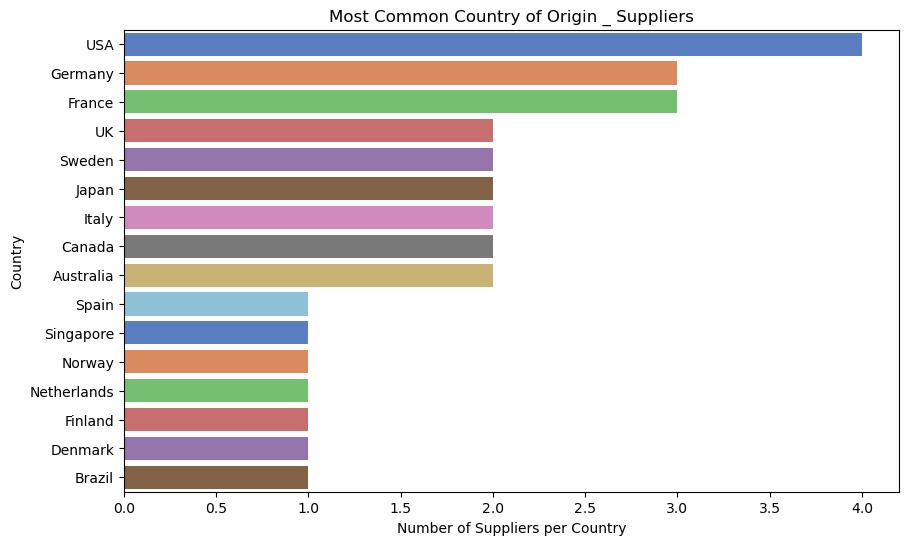

In [52]:
# TODO: Convert your list of tuples to a dataframe
df_country_suppliers = pd.DataFrame(rows, columns=['Country', 'Supplier_Count'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Supplier_Count', y='Country', data=df_country_suppliers, hue='Country', legend=False, palette='muted')

plt.title('Most Common Country of Origin _ Suppliers')
plt.xlabel('Number of Suppliers per Country')
plt.ylabel('Country')
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [53]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS common_cust_count
    FROM Customers
    GROUP BY Country
    ORDER BY common_cust_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


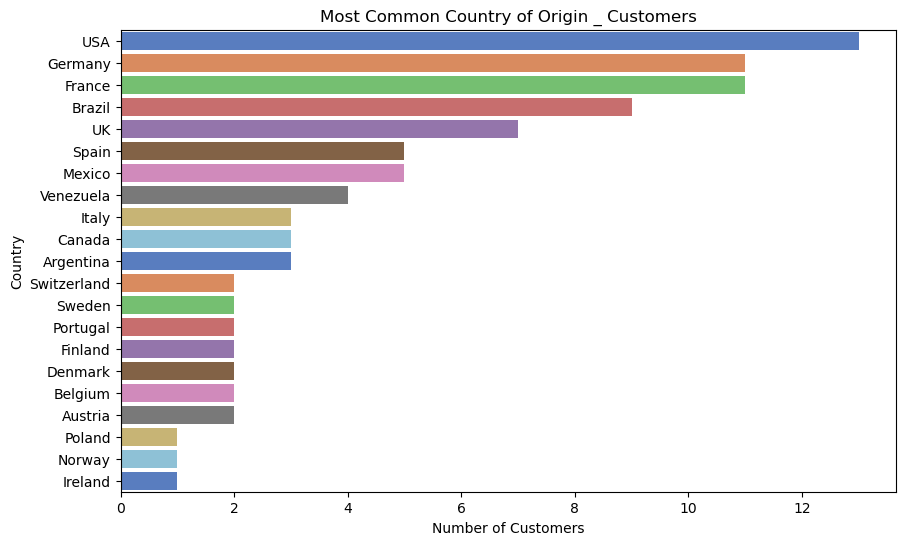

In [54]:
# TODO: Convert your list of tuples to a dataframe
df_country_customers = pd.DataFrame(rows, columns=['Country', 'Customer_Count'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Customer_Count', y='Country', data=df_country_customers, hue='Country', legend=False, palette='muted')

plt.title('Most Common Country of Origin _ Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [56]:
# TODO: Write a SQL query which will answer the question above.
# JOIN gives us INNER JOIN by default
cursor.execute("""
    SELECT P.ProductName, SUM(O.Quantity) AS unpopular_prod_quantity
    FROM Products P
    JOIN OrderDetails O ON P.ProductID = O.ProductID
    GROUP BY P.ProductName
    ORDER BY unpopular_prod_quantity ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]



DataFrame:


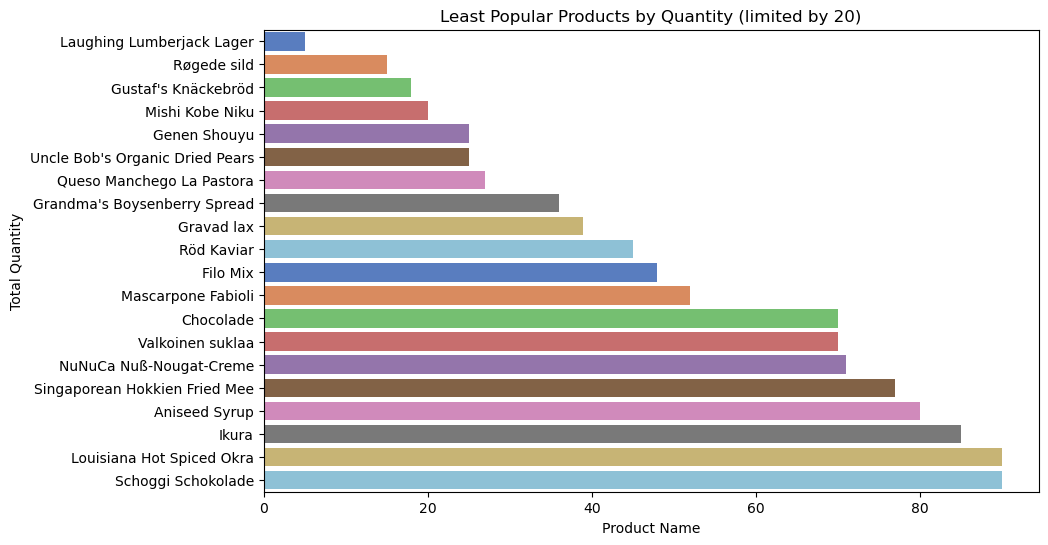

In [58]:
# TODO: Convert your list of tuples to a dataframe
df_least_popular_products_orders = pd.DataFrame(rows, columns=['Product_Name', 'Total_Quantity'])
print("\nDataFrame:")


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Quantity', y='Product_Name', data=df_least_popular_products_orders, hue='Product_Name', legend=False, palette='muted')

plt.title('Least Popular Products by Quantity (limited by 20)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity')
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [61]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT P.ProductName, 
    SUM(O.Quantity * P.Price) AS total_revenue
    FROM Products P
    JOIN OrderDetails O ON P.ProductID = O.ProductID
    GROUP BY P.ProductName
    ORDER BY total_revenue ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


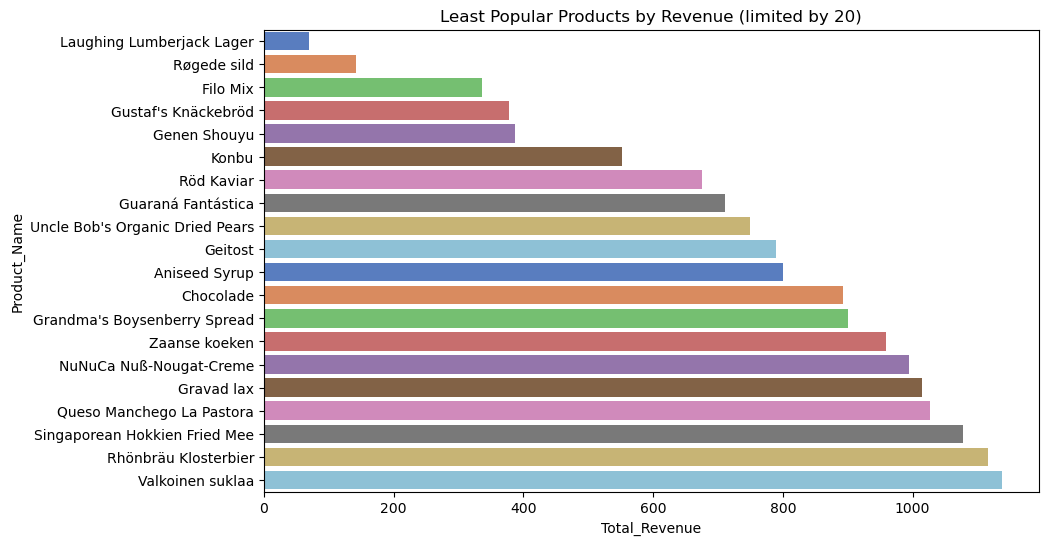

In [63]:
# TODO: Convert your list of tuples to a dataframe
df_least_popular_products_revenue = pd.DataFrame(rows, columns=['Product_Name', 'Total_Revenue'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Revenue', y='Product_Name', data=df_least_popular_products_revenue, hue='Product_Name', legend=False, palette='muted')

plt.title('Least Popular Products by Revenue (limited by 20)')
plt.xlabel('Total_Revenue')
plt.ylabel('Product_Name')
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [108]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT C.Country, 
    COUNT(O.OrderID) AS most_order_count
    FROM Customers C
    JOIN Orders O ON C.CustomerID = O.CustomerID
    GROUP BY C.Country
    ORDER BY most_order_count DESC;
""") 

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


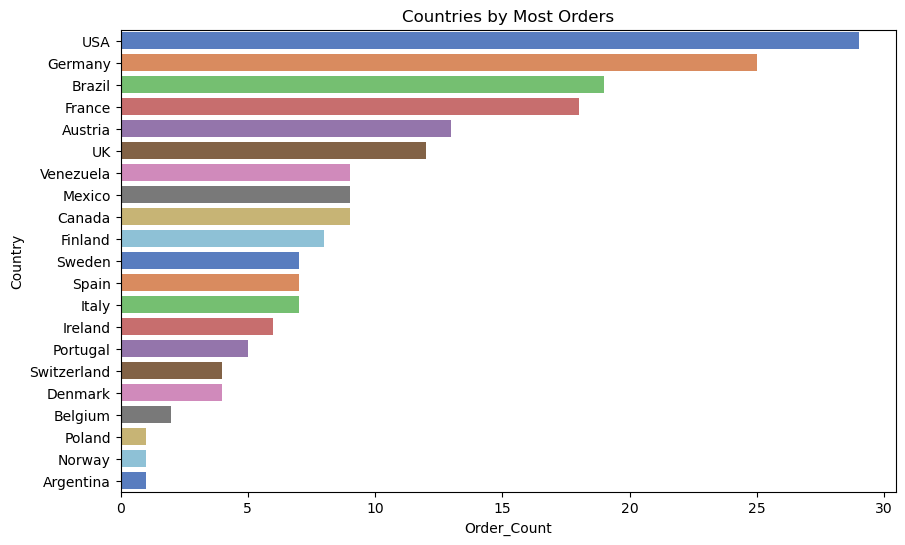

In [110]:
# TODO: Convert your list of tuples to a dataframe
df_countries_most_orders = pd.DataFrame(rows, columns=['Country', 'Order_Count'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Order_Count', y='Country', data=df_countries_most_orders, hue='Country', legend=False, palette='muted')

plt.title('Countries by Most Orders')
plt.xlabel('Order_Count')
plt.ylabel('Country')
plt.show()


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [111]:
# TODO: Write a SQL query which will answer the question above.
# Using LEFT JOIN to keep all rows 
cursor.execute("""
    SELECT C.Country,
    COUNT (*) AS no_order_customers
    FROM Customers C
    LEFT JOIN Orders O ON C.CustomerID = O.CustomerID
    WHERE O.OrderID IS NULL
    GROUP BY C.Country
    ORDER BY no_order_customers DESC;      
               
    """)

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


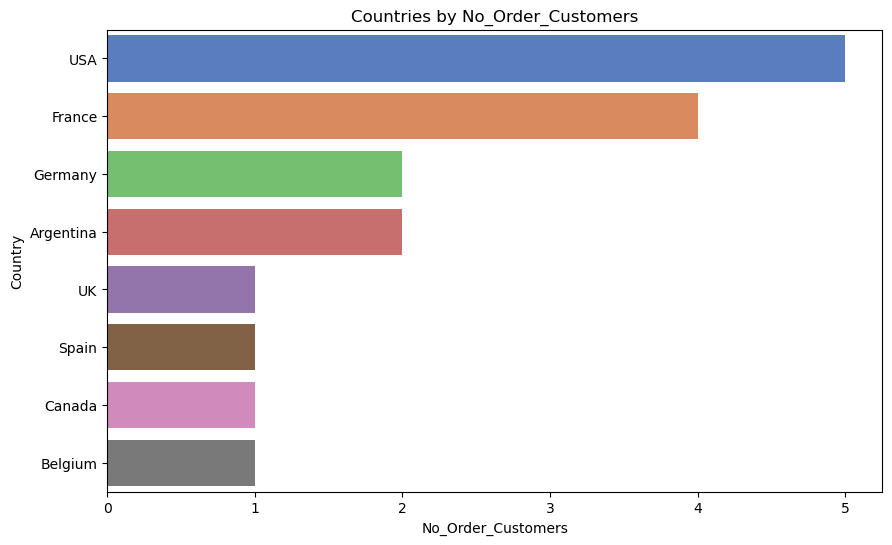

In [112]:
# TODO: Convert your list of tuples to a dataframe
df_no_orders_countries = pd.DataFrame(rows, columns=['Country', 'No_Order_Customers'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='No_Order_Customers', y='Country', data=df_no_orders_countries, hue='Country', legend=False, palette='muted')

plt.title('Countries by No_Order_Customers')
plt.xlabel('No_Order_Customers')
plt.ylabel('Country')
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [113]:
# TODO: Write a SQL query which will answer the question above.
# Using DISTINCT to avoid counting products by the same supplier in one order as separate orders
cursor.execute("""
    SELECT S.SupplierName,
    COUNT(DISTINCT OD.OrderID) AS pop_order_count
    FROM Suppliers S
    JOIN Products P ON S.SupplierID = P.SupplierID 
    JOIN OrderDetails OD ON P.ProductID  = OD.ProductID
    GROUP BY S.SupplierName
    ORDER BY pop_order_count DESC
    LIMIT 20;
            
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Plutzer Lebensmittelgroßmärkte AG', 37), ('Pavlova, Ltd.', 37), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 30), ('Formaggi Fortini s.r.l.', 27), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 18), ('New England Seafood Cannery', 17), ("Mayumi's", 16), ('Leka Trading', 16), ('Bigfoot Breweries', 16), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Heli Süßwaren GmbH & Co. KG', 14), ('Svensk Sjöföda AB', 13)]


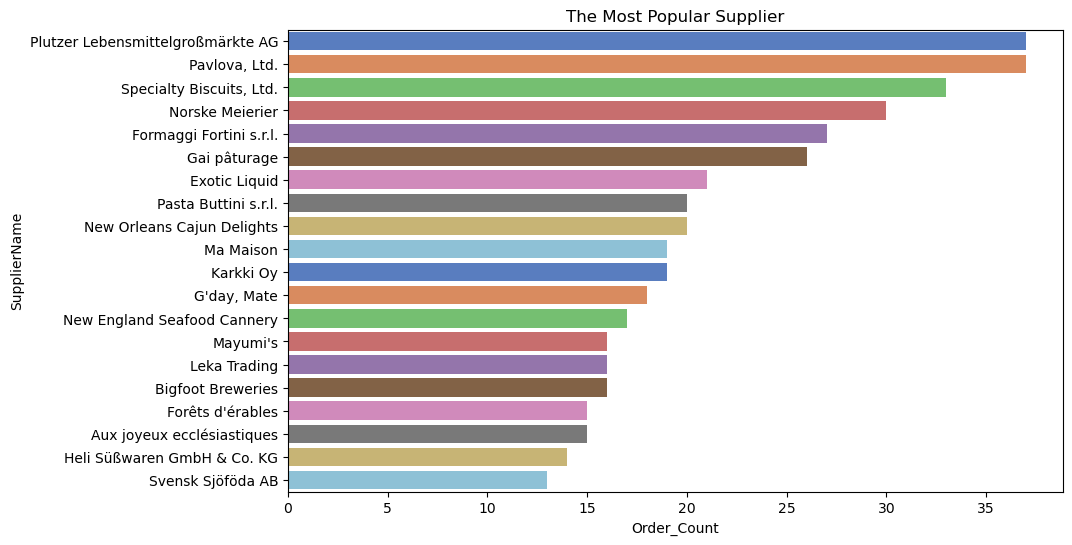

In [70]:
# TODO: Convert your list of tuples to a dataframe
df_most_popular_suppliers = pd.DataFrame(rows, columns=['SupplierName', 'Order_Count'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Order_Count', y='SupplierName', data=df_most_popular_suppliers, hue='SupplierName', legend=False, palette='muted')
plt.title('The Most Popular Supplier')
plt.xlabel('Order_Count')
plt.ylabel('SupplierName')
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

Countries with the greatest number of customers (first 4 in the list): 
* USA 
* Germany
* France 
* Brazil

Countries with the greatest number of suppliers (first 4 in the list):
* USA 
* Germany 
* France 
* UK

We see the same 3 countries at the top of each list while printing results and on histograms as well. To check the correlation, we're going to apply Pearson Coefficient and create scatterplot to check the direction of the correlation - if any. 

    Country  Customer_Count  Supplier_Count
0       USA              13               4
1   Germany              11               3
2    France              11               3
3    Brazil               9               1
4        UK               7               2
5     Spain               5               1
6     Italy               3               2
7    Canada               3               2
8    Sweden               2               2
9   Finland               2               1
10  Denmark               2               1
11   Norway               1               1


np.float64(0.7432304969551484)

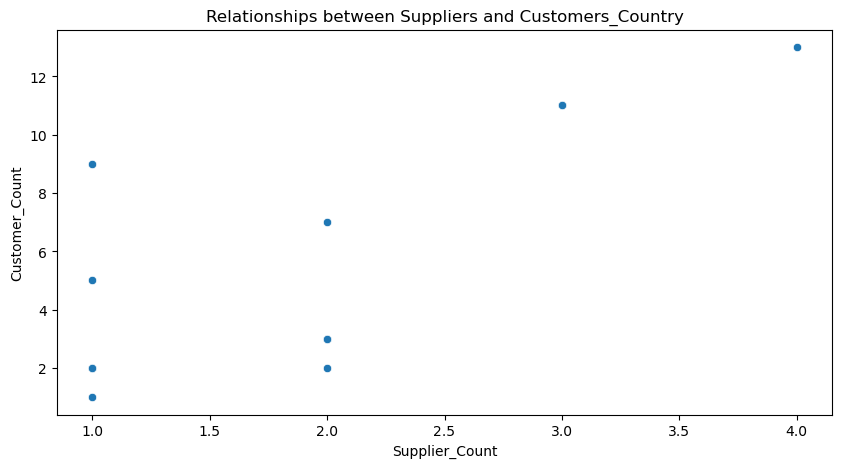

In [80]:
# Merging 2 existing dataframes on Country to apply Pearson correlation coefficient
df_merged_cust_suppl = pd.merge(df_country_customers, df_country_suppliers, on='Country', how='inner')
print(df_merged_cust_suppl)

# Creating scatterplot to see the relationships between most customers and most suppliers
fig, axes = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Supplier_Count', y='Customer_Count', data=df_merged_cust_suppl)
plt.title('Relationships between Suppliers and Customers_Country')

# calculating pearson's coefficient on merged dataframe
df_merged_cust_suppl['Supplier_Count'].corr(df_merged_cust_suppl['Customer_Count'])


Pearson correlation coefficient is 0.74 which suggests a strong positive correlation between number of customers and number of suppliers: as the number of customers from a country increases, the number of suppliers increase as well. We can see the correlation on the scatterplot. 

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

The least popular product is Laughing Lumberjack Lager, which is significantly less popular than its predecessor - next in the list Rogede Sild: 
- 5 vs 15 in the "Least Popular by Order" data analysis 
- 70 vs 142.5 in the "Least Popular by Revenue" data analysis.

After applying Pearson correlation coefficient, we see that there's a mooderate positive correlation 0,68 between less popular products by quantity and less popular products by revenue. 

                       Product_Name  Total_Quantity  Total_Revenue
0         Laughing Lumberjack Lager               5           70.0
1                       Røgede sild              15          142.5
2               Gustaf's Knäckebröd              18          378.0
3                      Genen Shouyu              25          387.5
4   Uncle Bob's Organic Dried Pears              25          750.0
5         Queso Manchego La Pastora              27         1026.0
6      Grandma's Boysenberry Spread              36          900.0
7                        Gravad lax              39         1014.0
8                        Röd Kaviar              45          675.0
9                          Filo Mix              48          336.0
10                        Chocolade              70          892.5
11                 Valkoinen suklaa              70         1137.5
12          NuNuCa Nuß-Nougat-Creme              71          994.0
13    Singaporean Hokkien Fried Mee              77         10

np.float64(0.6855559447357865)

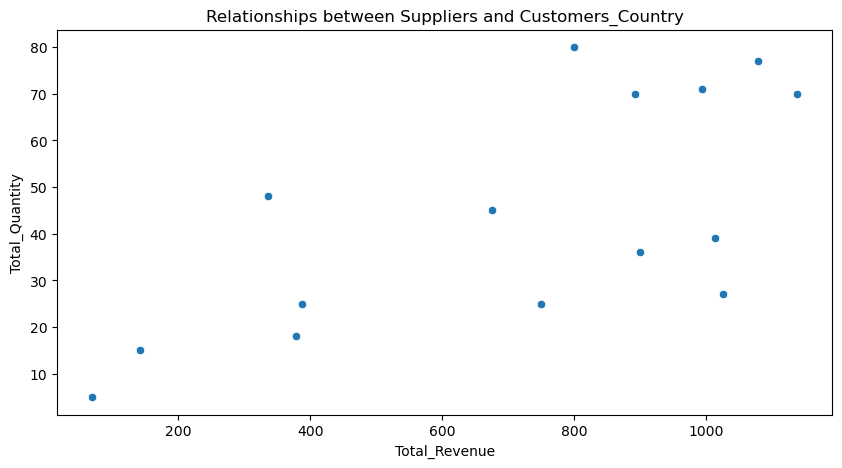

In [ ]:
# Merging 2 existing dataframes on Product_Name to apply Pearson correlation coefficient
df_merged_revenue = pd.merge(df_least_popular_products_orders, df_least_popular_products_revenue, on='Product_Name', how='inner')
print(df_merged_revenue)

# Creating scatterplot to see the relationships between least popular products by revenue and orders
fig, axes = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Total_Revenue', y='Total_Quantity', data=df_merged_revenue)
plt.title('Relationships between Suppliers and Customers_Country')

# calculating pearson's coefficient on merged dataframe
df_merged_revenue['Total_Revenue'].corr(df_merged_revenue['Total_Quantity'])

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

Country with both the most orders and most number of customers who do not order is USA. 
After applying the Pearson coefficient and creating a scatterplot, we observe a strong positive correlation of 0.79, which indicates that the country with most customers has the greatest number of non-ordering customers. 

Non-ordering customers are unique customer accounts registered in the system who hadn't ordered anything yet. This suggests that USA is a country that has the most registered customers total, and the customers who have the most interest in buying from Osiris. Non-ordering customers might be potential customers or accounts created by mistake, eventually switched to another email and Customer ID.

   Country  Order_Count  No_Order_Customers
0      USA           29                   5
1  Germany           25                   2
2   France           18                   4
3       UK           12                   1
4   Canada            9                   1
5    Spain            7                   1
6  Belgium            2                   1


np.float64(0.7920041479756125)

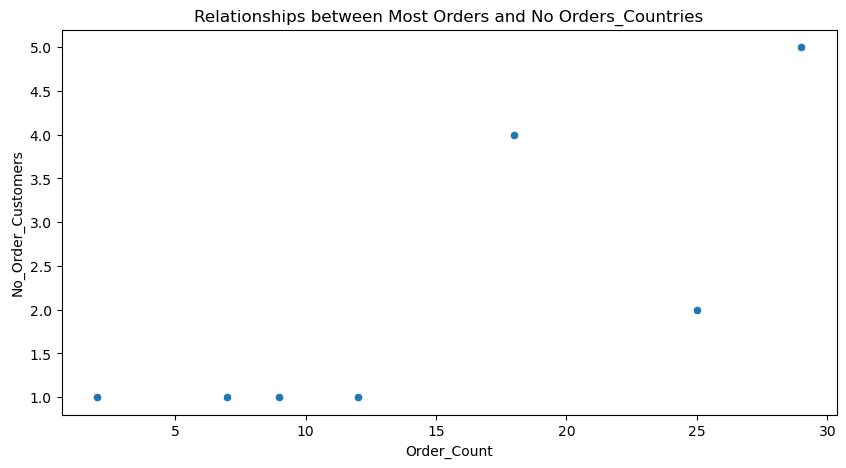

In [107]:
# Merging 2 existing dataframes on Country to apply Pearson correlation coefficient
df_merged_no_and_most_orders = pd.merge(df_countries_most_orders, df_no_orders_countries, on='Country', how='inner')
print(df_merged_no_and_most_orders)

# Creating scatterplot to see the relationships between most orders and no orders
fig, axes = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Order_Count', y='No_Order_Customers', data=df_merged_no_and_most_orders)
plt.title('Relationships between Most Orders and No Orders_Countries')

# calculating pearson's coefficient on merged dataframe
df_merged_no_and_most_orders['Order_Count'].corr(df_merged_no_and_most_orders['No_Order_Customers'])

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]

We have a tie between two most popular suppliers with order count 37: 
- Plutzer Lebensmittelgroßmärkte AG,
- Pavlova, Ltd.

We can observe both at the top of the suppliers list in the histogram below. 

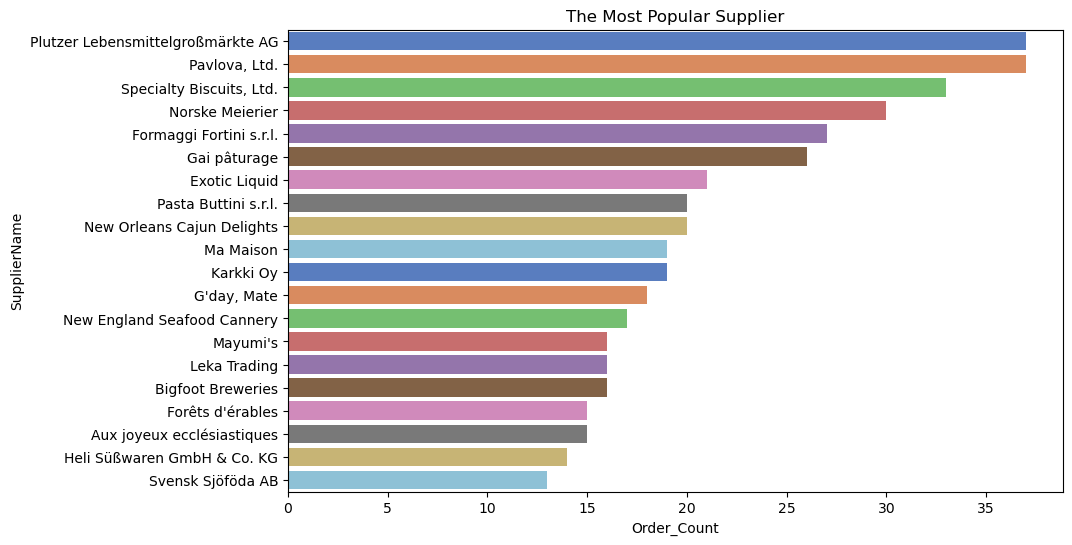

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(x='Order_Count', y='SupplierName', data=df_most_popular_suppliers, hue='SupplierName', legend=False, palette='muted')
plt.title('The Most Popular Supplier')
plt.xlabel('Order_Count')
plt.ylabel('SupplierName')
plt.show()